<a href="https://colab.research.google.com/github/alimistro1234/Project_Graduation_Amit/blob/main/Project_Amit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import pandas as pd
import numpy as np
import re
from keras.preprocessing.sequence import pad_sequences
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout,Embedding

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [91]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [92]:
train=pd.read_csv('/content/drive/MyDrive/tweets/train.csv')
test=pd.read_csv('/content/drive/MyDrive/tweets/test.csv')

In [93]:
train.head(30)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [94]:
test.head(30)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [95]:
length_train=len(train)
length_test=len(test)
print('Length of train data is:',length_train,'\nLength of train data is:',length_test)

Length of train data is: 7613 
Length of train data is: 3263


In [96]:
train.isna().sum()/length_train*100

id           0.000000
keyword      0.801261
location    33.272035
text         0.000000
target       0.000000
dtype: float64

In [97]:
test.isna().sum()/length_test*100

id           0.000000
keyword      0.796813
location    33.864542
text         0.000000
dtype: float64

In [98]:
location_train=train['location']
location_test=test['location']
keyword_train=train['keyword']
keyword_test=test['keyword']

In [99]:
location_train.value_counts()

USA                    104
New York                71
United States           50
London                  45
Canada                  29
                      ... 
MontrÌ©al, QuÌ©bec       1
Montreal                 1
ÌÏT: 6.4682,3.18287      1
Live4Heed??              1
Lincoln                  1
Name: location, Length: 3341, dtype: int64

In [100]:
location_test.value_counts()

New York                  38
USA                       37
Worldwide                 16
United States             15
London                    13
                          ..
Medford, NJ                1
Quezon City                1
LanÌ¼s                     1
USA,Washington,Seattle     1
Brussels, Belgium          1
Name: location, Length: 1602, dtype: int64

In [101]:
keyword_train.value_counts()

fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [102]:
keyword_test.value_counts()

deluged               23
demolished            22
rubble                22
first%20responders    21
seismic               21
                      ..
threat                 5
fatalities             5
forest%20fire          5
inundation             4
epicentre              1
Name: keyword, Length: 221, dtype: int64

In [103]:
train_data=train['text']
test_data=test['text']

In [104]:
import nltk
import re
from nltk.corpus import stopwords
stopwords=stopwords.words('english')

In [105]:
def clean_tweets(tweet):
    tweet=re.sub(r'#[a-zA-Z0-9_]+','',tweet)
    tweet=re.sub(r'@[a-zA-Z0-9_]+','',tweet)
    tweet=re.sub(r'^\s+','',tweet)
    tweet=re.sub(r'\s+$','',tweet)
    tweet=re.sub(r'\d+','',tweet)
    tweet=re.sub(r'\W',' ',tweet)
    tweet=re.sub(r'https:\/\/\s+','',tweet)
    return tweet
from nltk.stem import PorterStemmer
def process_tweets(tweets):
    result=[]
    unique=[]
    for tweet in tweets:
        tweet=clean_tweets(tweet)
        tweet=tweet.split()
        tweet=[word for word in tweet]
        ps=PorterStemmer()
        tweet=[ps.stem(word)for word in tweet]
        result.append(tweet)
        unique=list(tweet)
    return result

In [106]:
proc=process_tweets(train['text'])

In [107]:
proc


[['our',
  'deed',
  'are',
  'the',
  'reason',
  'of',
  'thi',
  'may',
  'allah',
  'forgiv',
  'us',
  'all'],
 ['forest', 'fire', 'near', 'La', 'rong', 'sask', 'canada'],
 ['all',
  'resid',
  'ask',
  'to',
  'shelter',
  'in',
  'place',
  'are',
  'be',
  'notifi',
  'by',
  'offic',
  'No',
  'other',
  'evacu',
  'or',
  'shelter',
  'in',
  'place',
  'order',
  'are',
  'expect'],
 ['peopl', 'receiv', 'evacu', 'order', 'in', 'california'],
 ['just',
  'got',
  'sent',
  'thi',
  'photo',
  'from',
  'rubi',
  'as',
  'smoke',
  'from',
  'pour',
  'into',
  'a',
  'school'],
 ['updat',
  'california',
  'hwi',
  'close',
  'in',
  'both',
  'direct',
  'due',
  'to',
  'lake',
  'counti',
  'fire'],
 ['heavi',
  'rain',
  'caus',
  'flash',
  'flood',
  'of',
  'street',
  'in',
  'manit',
  'colorado',
  'spring',
  'area'],
 ['I',
  'm',
  'on',
  'top',
  'of',
  'the',
  'hill',
  'and',
  'I',
  'can',
  'see',
  'a',
  'fire',
  'in',
  'the',
  'wood'],
 ['there',
 

In [108]:
def max_stop_word(tweets):
    freqs={}
    for tweet in tweets: #t0,t1
        for word in tweet:#w0-w1-w2/ w3-w4-5
            if word.lower() in stopwords:#if not a stop word
                key=(word)# add it to dict (word, target)
                if key in freqs: # if exists add 1
                    freqs[key]+=1
                else:
                    freqs[key]=1
    return freqs
def max_word(tweets):
    freqs={}
    for tweet in tweets: 
        for word in tweet:
            if word.lower() not in stopwords:
                key=(word)
                if key in freqs:
                    freqs[key]+=1
                else:
                    freqs[key]=1
    return freqs

In [109]:
from nltk.stem import PorterStemmer
def process_tweets_original(tweets):
    result=[]
    for tweet in tweets:

        tweet=clean_tweets(tweet)
        tweet=tweet.split()
        #remove stop words 
        tweet=[word for word in tweet  if word.lower() not in stopwords]
        #stemming 
        ps=PorterStemmer()

        tweet=[ps.stem(word) for word in tweet ]
        result.append(tweet)
    return result

In [110]:
train_tweets = process_tweets_original(train['text'])
test_tweets=process_tweets_original(test['text'])

In [111]:
train_tweets

[['deed', 'reason', 'may', 'allah', 'forgiv', 'us'],
 ['forest', 'fire', 'near', 'La', 'rong', 'sask', 'canada'],
 ['resid',
  'ask',
  'shelter',
  'place',
  'notifi',
  'offic',
  'evacu',
  'shelter',
  'place',
  'order',
  'expect'],
 ['peopl', 'receiv', 'evacu', 'order', 'california'],
 ['got', 'sent', 'photo', 'rubi', 'smoke', 'pour', 'school'],
 ['updat',
  'california',
  'hwi',
  'close',
  'direct',
  'due',
  'lake',
  'counti',
  'fire'],
 ['heavi',
  'rain',
  'caus',
  'flash',
  'flood',
  'street',
  'manit',
  'colorado',
  'spring',
  'area'],
 ['top', 'hill', 'see', 'fire', 'wood'],
 ['emerg', 'evacu', 'happen', 'build', 'across', 'street'],
 ['afraid', 'tornado', 'come', 'area'],
 ['three', 'peopl', 'die', 'heat', 'wave', 'far'],
 ['haha',
  'south',
  'tampa',
  'get',
  'flood',
  'hah',
  'wait',
  'second',
  'live',
  'south',
  'tampa',
  'gonna',
  'gonna',
  'fvck'],
 ['day', 'lost', 'count'],
 ['bago', 'myanmar', 'arriv', 'bago'],
 ['damag', 'school', 'bu

In [112]:

maxword=max_word(proc)
maxword=sorted(maxword.items(),key=lambda x:x[1])
maxword[-1]

('co', 4738)

In [113]:
max_stopword=max_stop_word(proc)
max_stopword=sorted(max_stopword.items(),key=lambda x:x[1])
max_stopword[-1]

('t', 5185)

In [114]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(train['text'].values)
X = tokenizer.texts_to_sequences(train['text'].values)
X = pad_sequences(X)

In [115]:
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.7))
model.add(LSTM(196))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 29, 128)           256000    
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 29, 128)          0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 196)               254800    
                                                                 
 dense_1 (Dense)             (None, 2)                 394       
                                                                 
Total params: 511,194
Trainable params: 511,194
Non-trainable params: 0
_________________________________________________________________
None


In [116]:
Y = pd.get_dummies(train['target']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(5100, 29) (5100, 2)
(2513, 29) (2513, 2)


In [117]:
batch_size = 32
history=model.fit(X_train, Y_train, epochs = 11, batch_size=batch_size)

Epoch 1/11
160/160 [==============================] - 17s 94ms/step - loss: 0.5839 - accuracy: 0.6914
Epoch 2/11
160/160 [==============================] - 15s 92ms/step - loss: 0.4327 - accuracy: 0.8088
Epoch 3/11
160/160 [==============================] - 15s 93ms/step - loss: 0.3804 - accuracy: 0.8390
Epoch 4/11
160/160 [==============================] - 15s 93ms/step - loss: 0.3421 - accuracy: 0.8606
Epoch 5/11
160/160 [==============================] - 16s 100ms/step - loss: 0.3192 - accuracy: 0.8714
Epoch 6/11
160/160 [==============================] - 15s 93ms/step - loss: 0.2932 - accuracy: 0.8804
Epoch 7/11
160/160 [==============================] - 15s 93ms/step - loss: 0.2765 - accuracy: 0.8910
Epoch 8/11
160/160 [==============================] - 15s 95ms/step - loss: 0.2577 - accuracy: 0.8961
Epoch 9/11
160/160 [==============================] - 17s 108ms/step - loss: 0.2468 - accuracy: 0.9039
Epoch 10/11
160/160 [==============================] - 15s 95ms/step - loss: 0.2

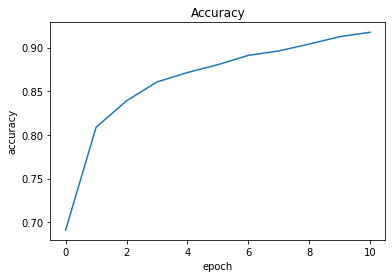

In [118]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

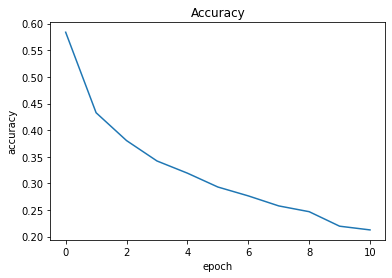

In [119]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [120]:
validation_size = 1000

X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
X_test = X_test[:-validation_size]
Y_test = Y_test[:-validation_size]
score,acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

48/48 - 2s - loss: 0.6360 - accuracy: 0.7429 - 2s/epoch - 39ms/step
score: 0.64
acc: 0.74


In [121]:
max_fatures = 2000
tokenizer_test = Tokenizer(num_words=max_fatures, split=' ')
tokenizer_test.fit_on_texts(test['text'].values)
X_test_1 = tokenizer.texts_to_sequences(test['text'].values)
X_test_1 = pad_sequences(X_test_1)

In [122]:
X_test_1.shape

(3263, 28)

In [123]:
X_test_1=X_test_1[15:]
X_test_1.shape
X_test_1=np.reshape(X_test_1,(3136 ,29))

In [124]:
y_pred=model.predict(X_test_1)
y_pred

array([[0.90296113, 0.09703887],
       [0.96308565, 0.03691433],
       [0.73815674, 0.26184326],
       ...,
       [0.01731003, 0.98269   ],
       [0.01100664, 0.98899335],
       [0.47289142, 0.5271086 ]], dtype=float32)

In [125]:
model.save('model.h5')